   Unnamed: 0.1  Unnamed: 0     restaurant name restaurant type  \
0             0           0        #FeelTheROLL     Quick Bites   
1             1           1          #L-81 Cafe     Quick Bites   
2             2           2             #refuel            Cafe   
3             3           3  '@ Biryani Central   Casual Dining   
4             4           4          '@ The Bbq   Casual Dining   

   rate (out of 5)  num of ratings  avg cost (two people) online_order  \
0              3.4               7                  200.0           No   
1              3.9              48                  400.0          Yes   
2              3.7              37                  400.0          Yes   
3              2.7             135                  550.0          Yes   
4              2.8              40                  700.0          Yes   

  table booking                                      cuisines type  \
0            No                                          Fast Food   
1           

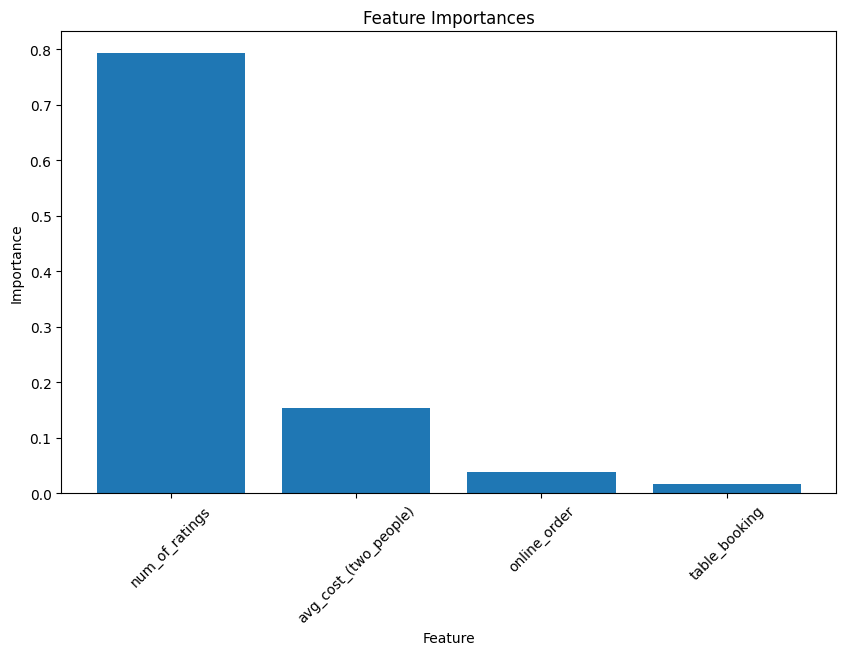

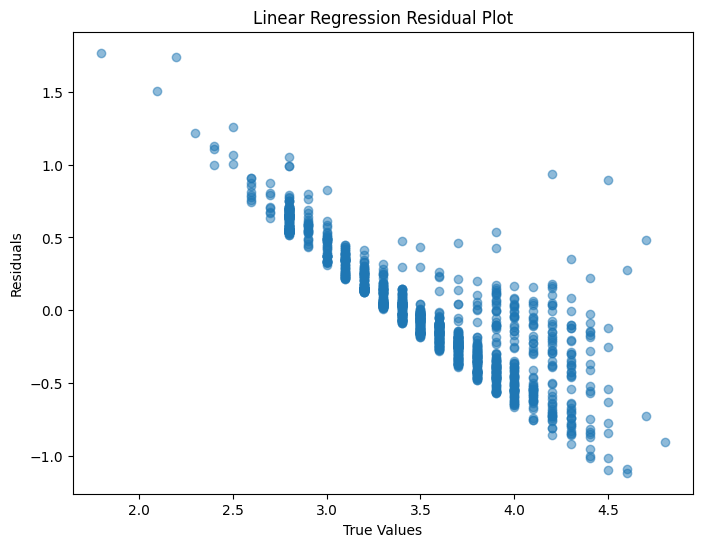

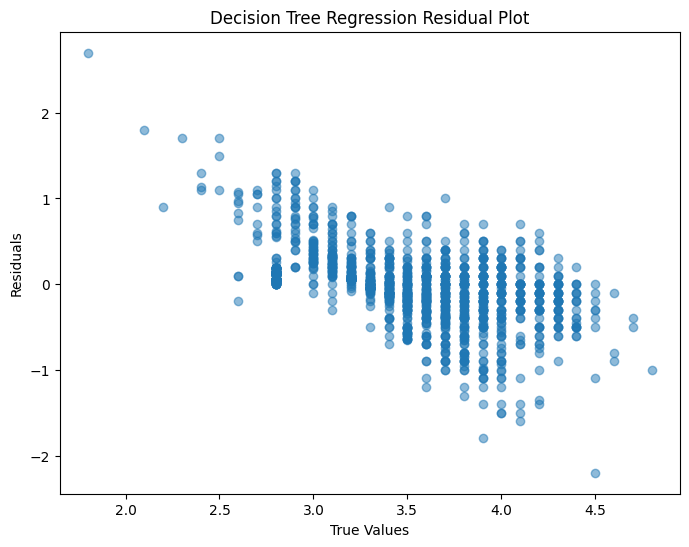

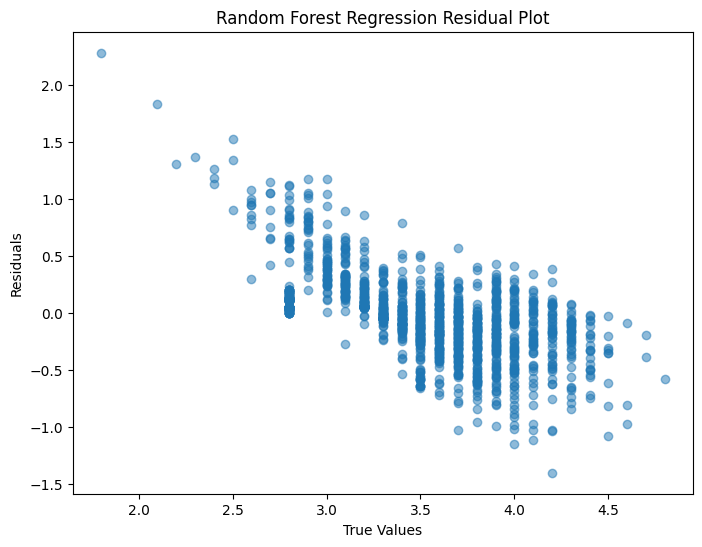

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "zomato.csv"  # Ensure the file path is correct
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
print(data.head())

# Rename columns for easier access
data.columns = [col.strip().replace(' ', '_').lower() for col in data.columns]

# Handle missing values in numerical columns
data.fillna({
    'avg_cost_(two_people)': data['avg_cost_(two_people)'].median(),
    'num_of_ratings': data['num_of_ratings'].median(),
    'rate_(out_of_5)': data['rate_(out_of_5)'].median()  # Target variable
}, inplace=True)

# Drop any remaining rows with missing values (if any)
data.dropna(inplace=True)

# Encode categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['table_booking', 'online_order', 'restaurant_type', 'cuisines_type', 'area']

for col in categorical_columns:
    if col in data.columns:  # Ensure column exists
        data[col] = label_encoder.fit_transform(data[col].astype(str))

# Select features and target variable
features = ['table_booking', 'online_order', 'avg_cost_(two_people)', 'num_of_ratings']
target = 'rate_(out_of_5)'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42)
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)

# Make predictions
y_pred = {name: model.predict(X_test) for name, model in models.items()}

# Evaluate models
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

metrics = {name: evaluate_model(y_test, y_pred_val) for name, y_pred_val in y_pred.items()}

# Print evaluation metrics
for name, metrics_val in metrics.items():
    print(f"{name} Metrics:")
    print(f"MAE: {metrics_val[0]:.2f}, MSE: {metrics_val[1]:.2f}, RMSE: {metrics_val[2]:.2f}, R²: {metrics_val[3]:.2f}\n")

# Visualization functions
def plot_feature_importances(model, feature_names):
    """Plot feature importance for tree-based models."""
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(indices)), importances[indices], align='center')
        plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=45)
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.title('Feature Importances')
        plt.show()

def plot_residuals(y_true, y_pred, title):
    """Plot residuals to check model performance."""
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred - y_true, alpha=0.5)
    plt.xlabel('True Values')
    plt.ylabel('Residuals')
    plt.title(title)
    plt.show()

# Plot feature importances for Random Forest model
plot_feature_importances(models['Random Forest Regression'], features)

# Plot residuals for each model
for name, y_pred_val in y_pred.items():
    plot_residuals(y_test, y_pred_val, f"{name} Residual Plot")
